In [6]:
   ## Task 1: Exploratory Data Analysis (EDA)

In [7]:
import pandas as pd

# Load the dataset
wine_df = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
print(wine_df.head())

# Check for missing values
print(wine_df.isnull().sum())

# Get summary statistics of the dataset
print(wine_df.describe())

# Check data types of the columns
print(wine_df.dtypes)


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phe

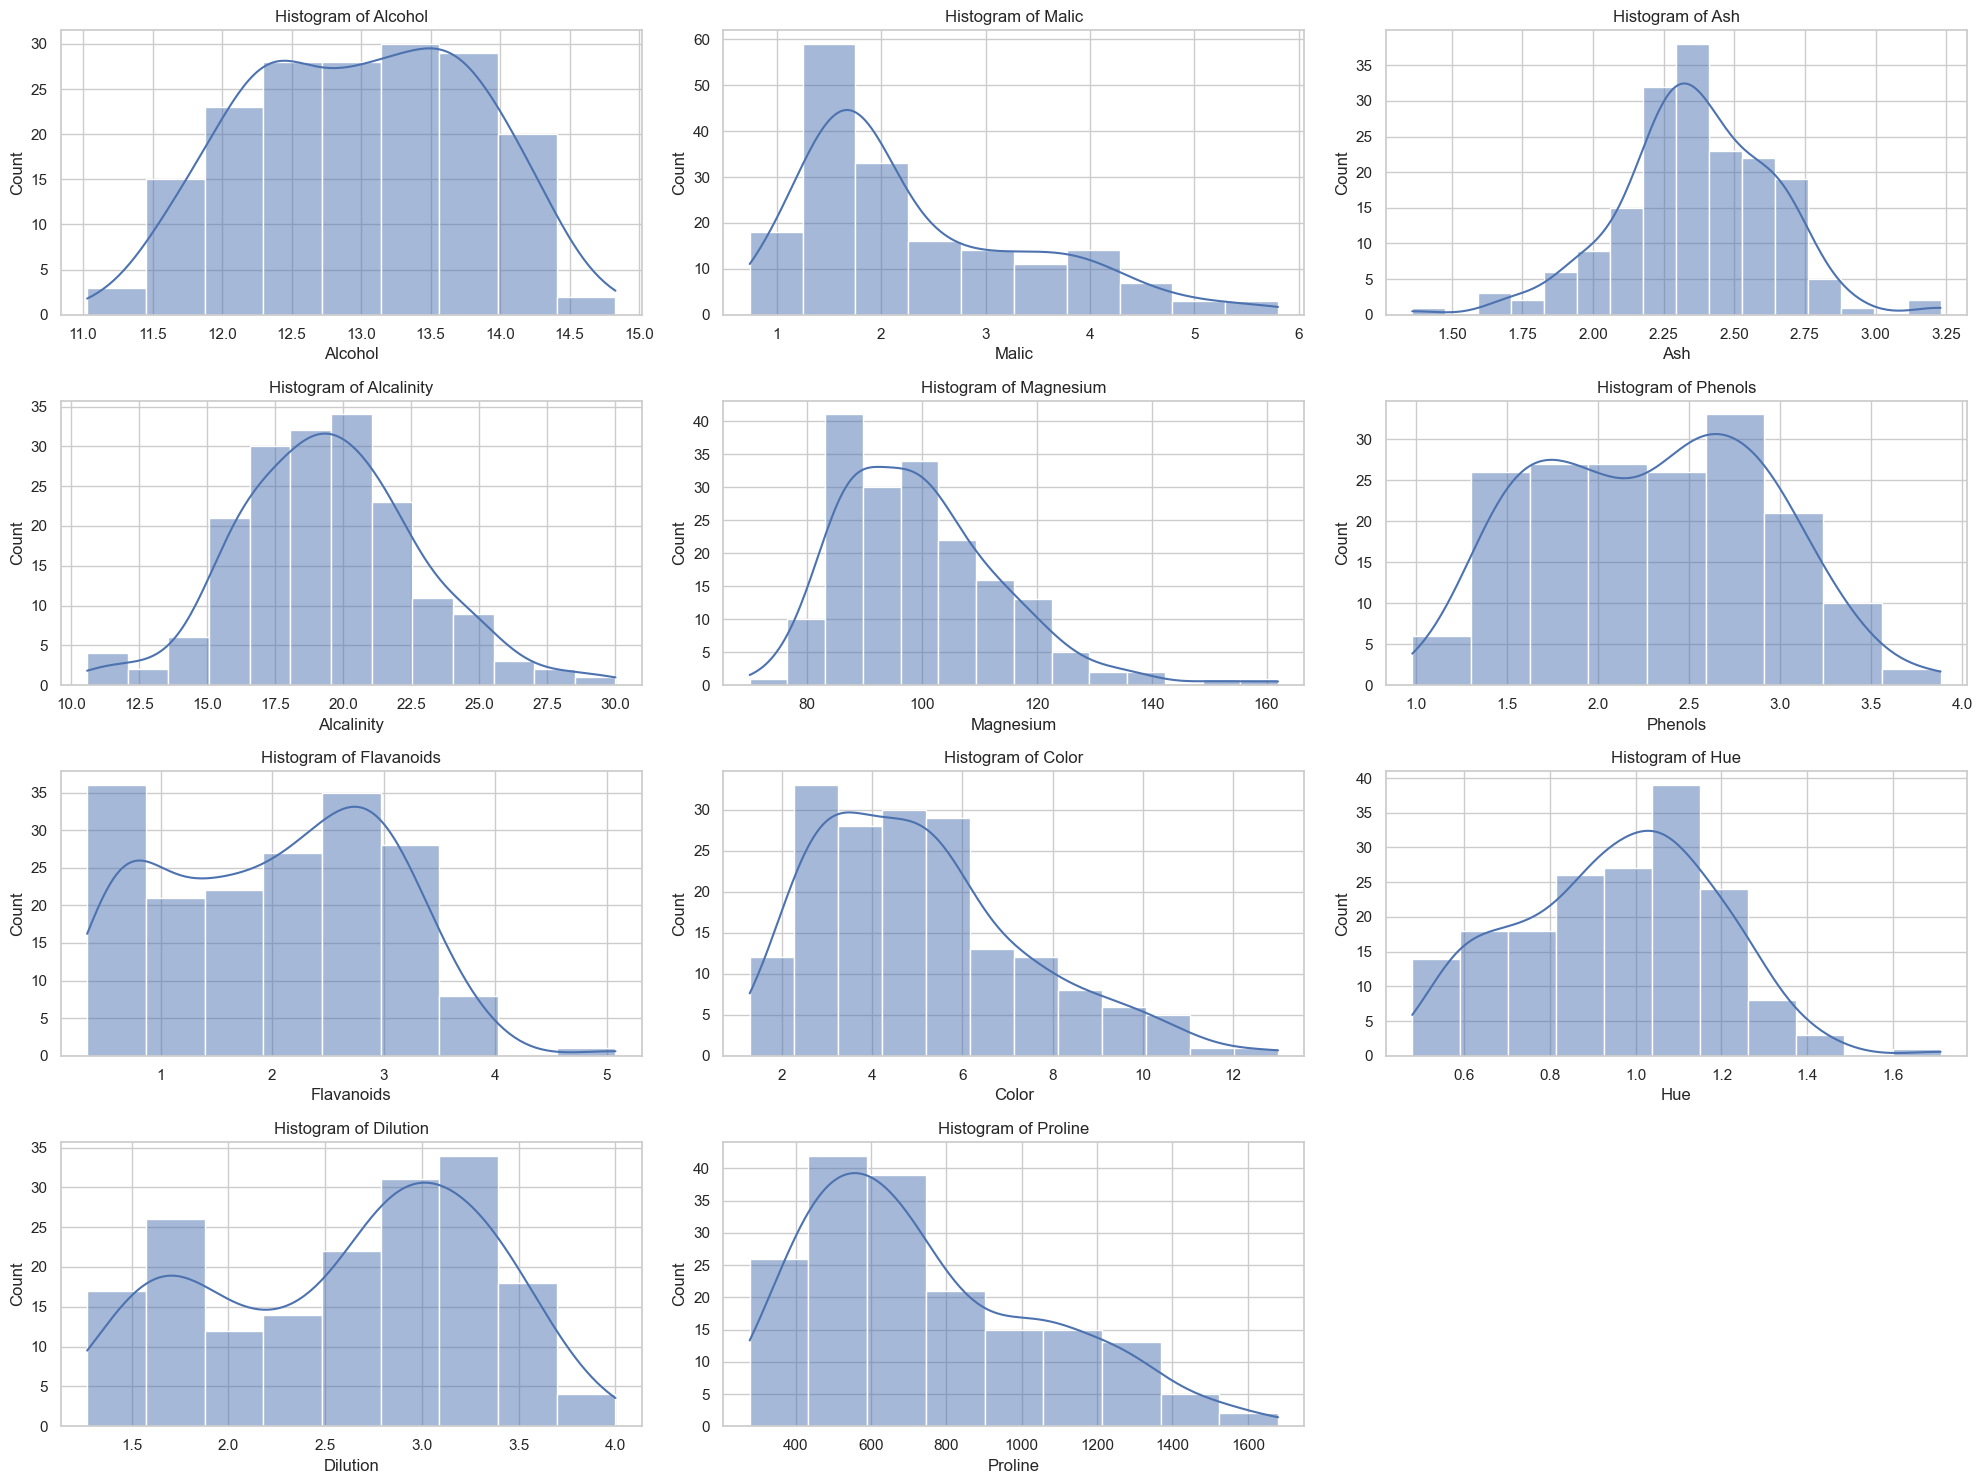

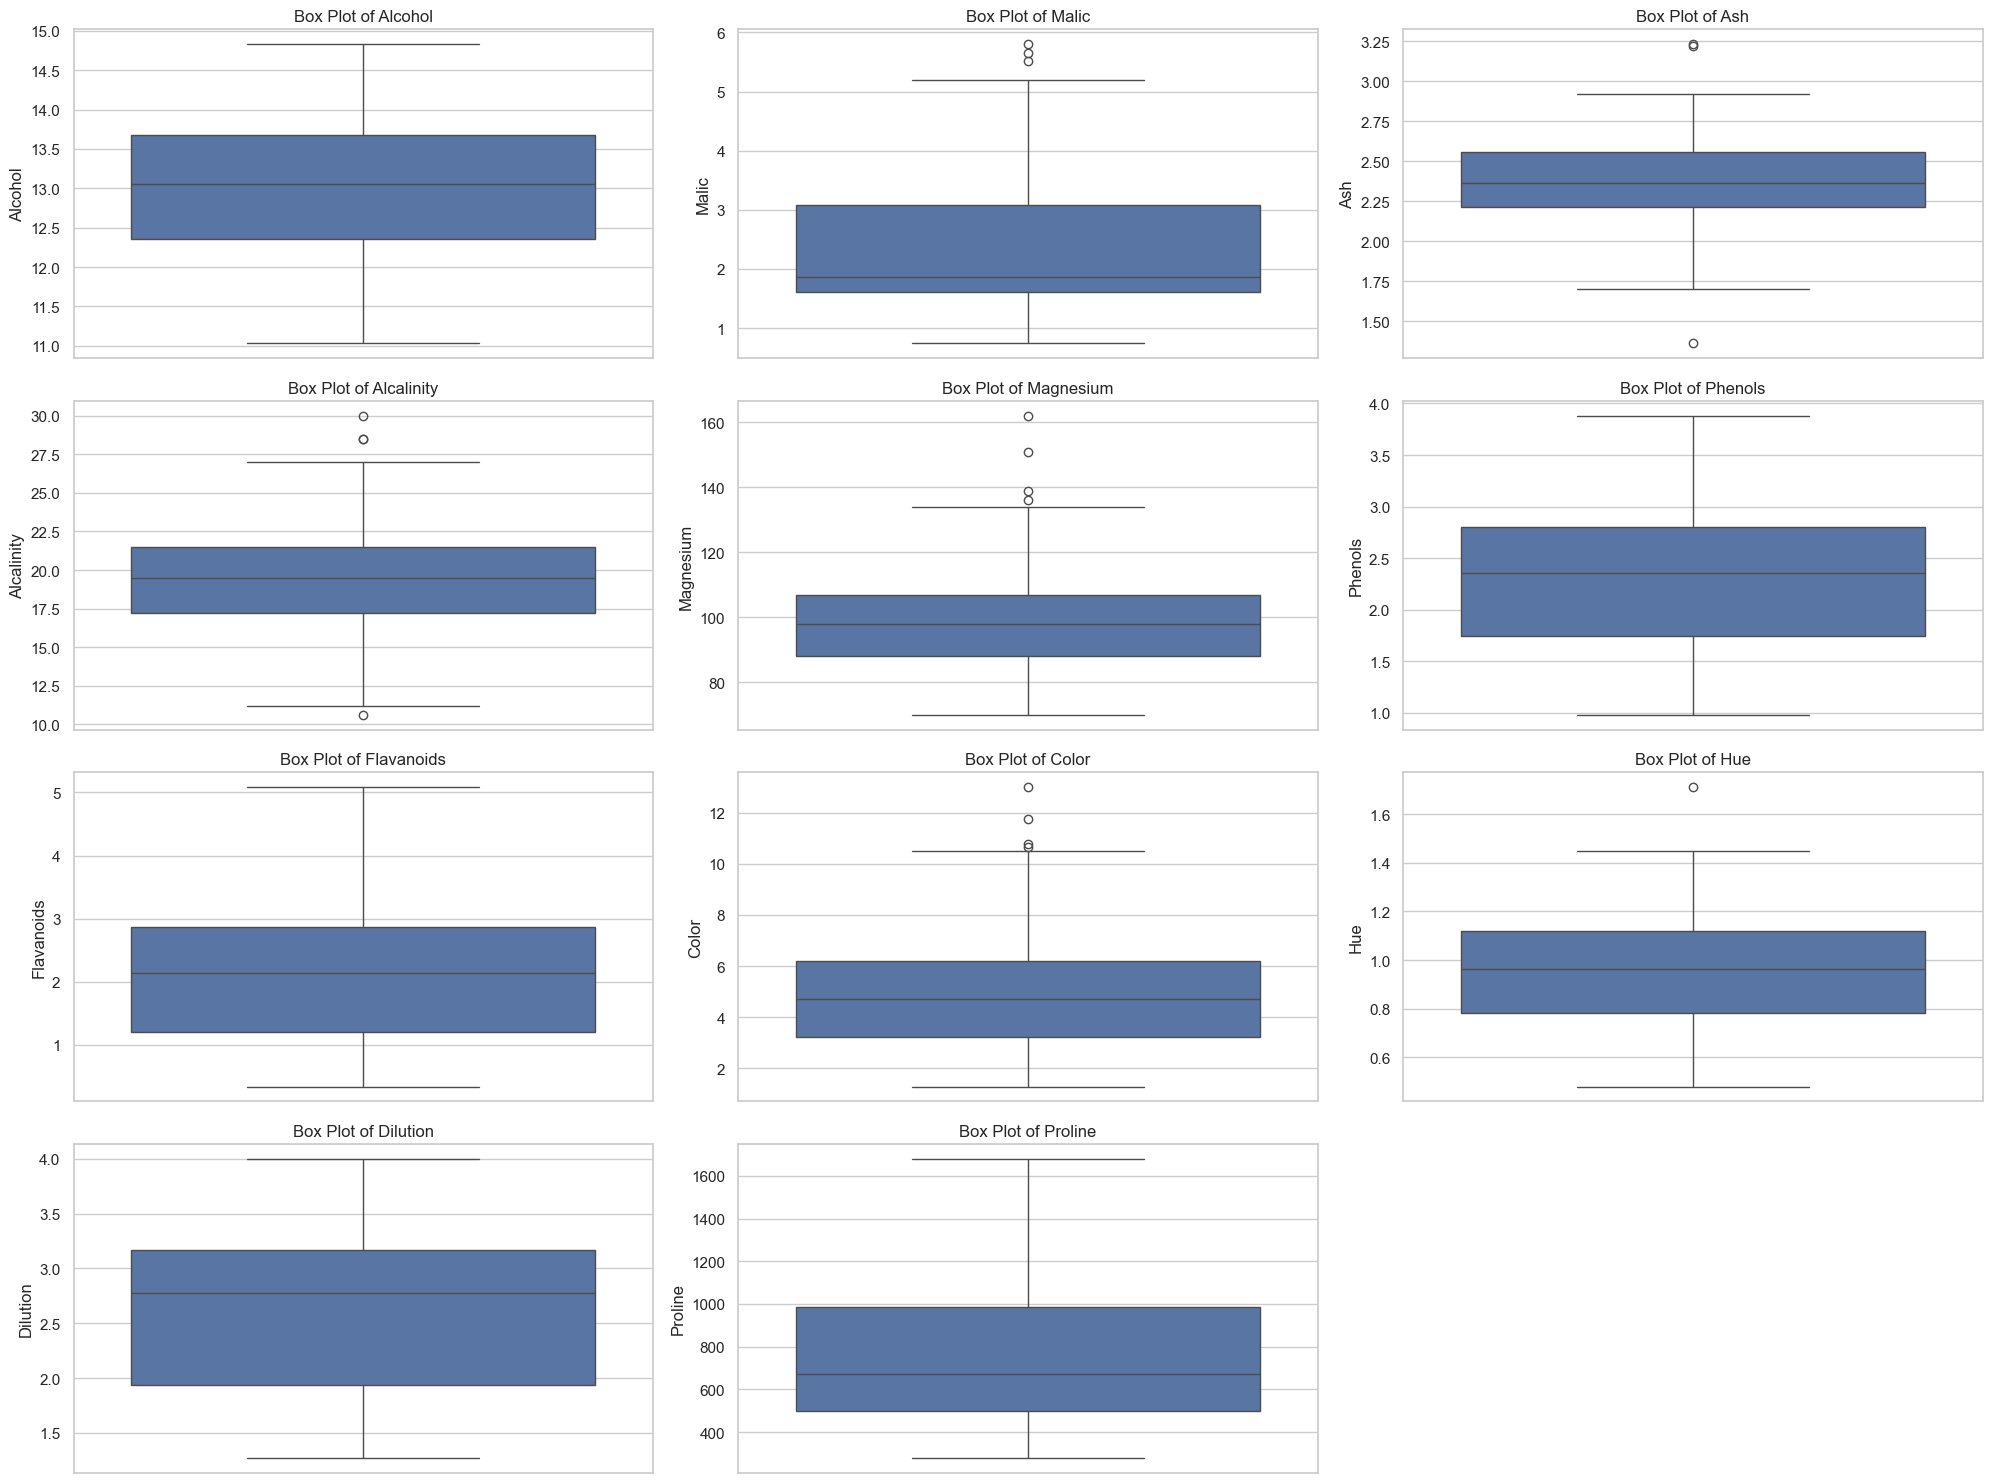

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14024\3996926388.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wine_df[feature], shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14024\3996926388.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wine_df[feature], shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14024\3996926388.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wine_df[feature], shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14024\3996926388.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.

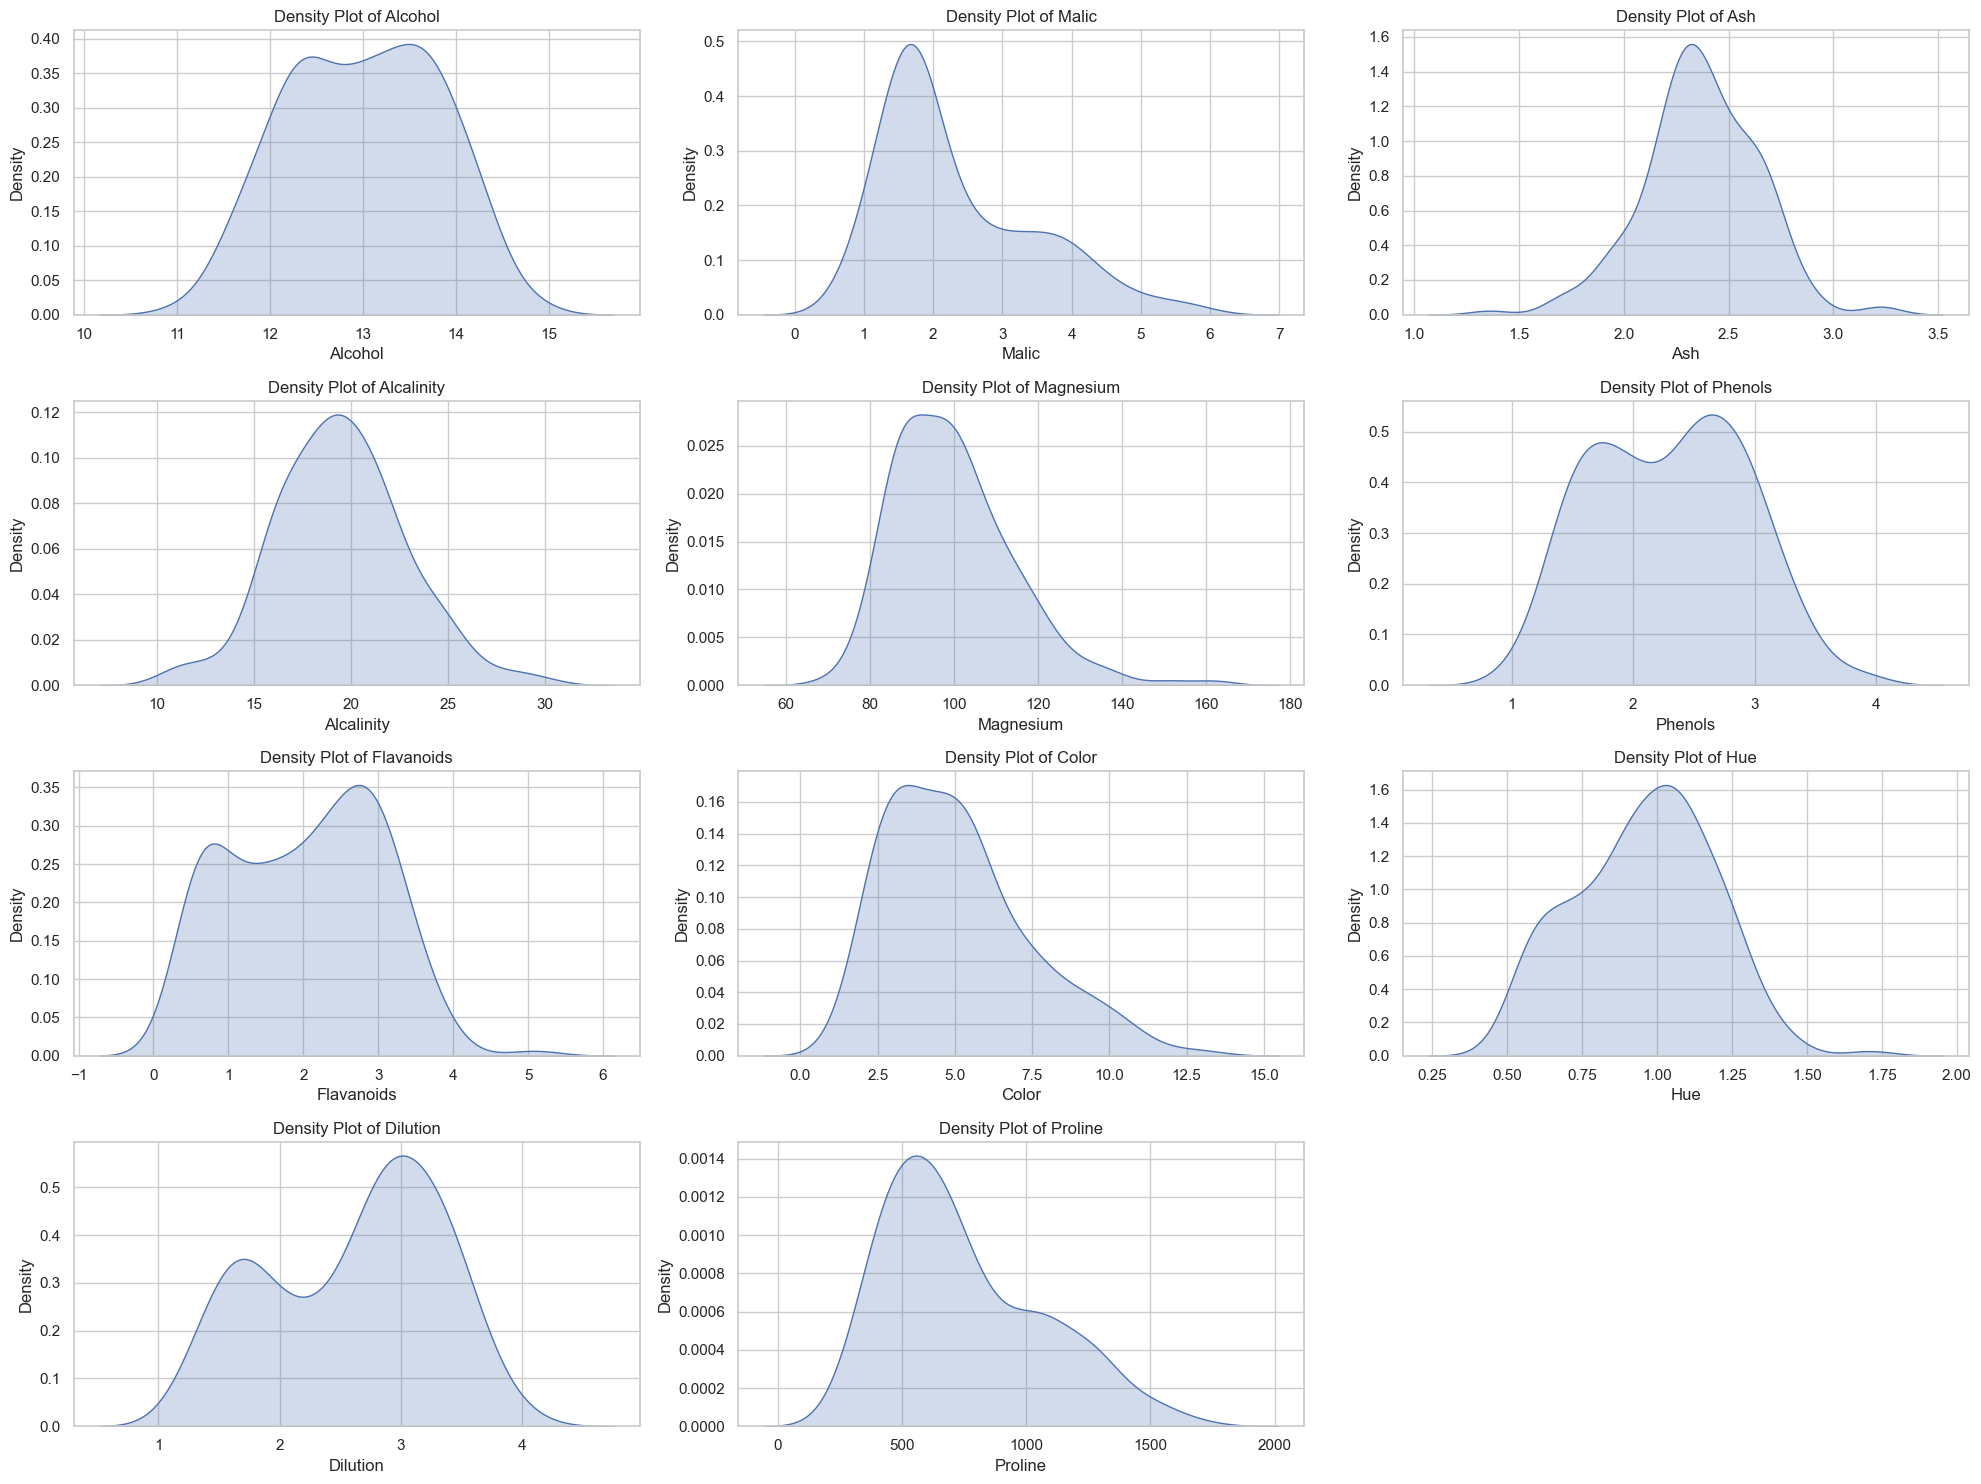

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# List of features to plot
features = ["Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Color", "Hue", "Dilution", "Proline"]

# Create subplots for histograms
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Create subplots for box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=wine_df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Create subplots for density plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(wine_df[feature], shade=True)
    plt.title(f'Density Plot of {feature}')
plt.tight_layout()
plt.show()


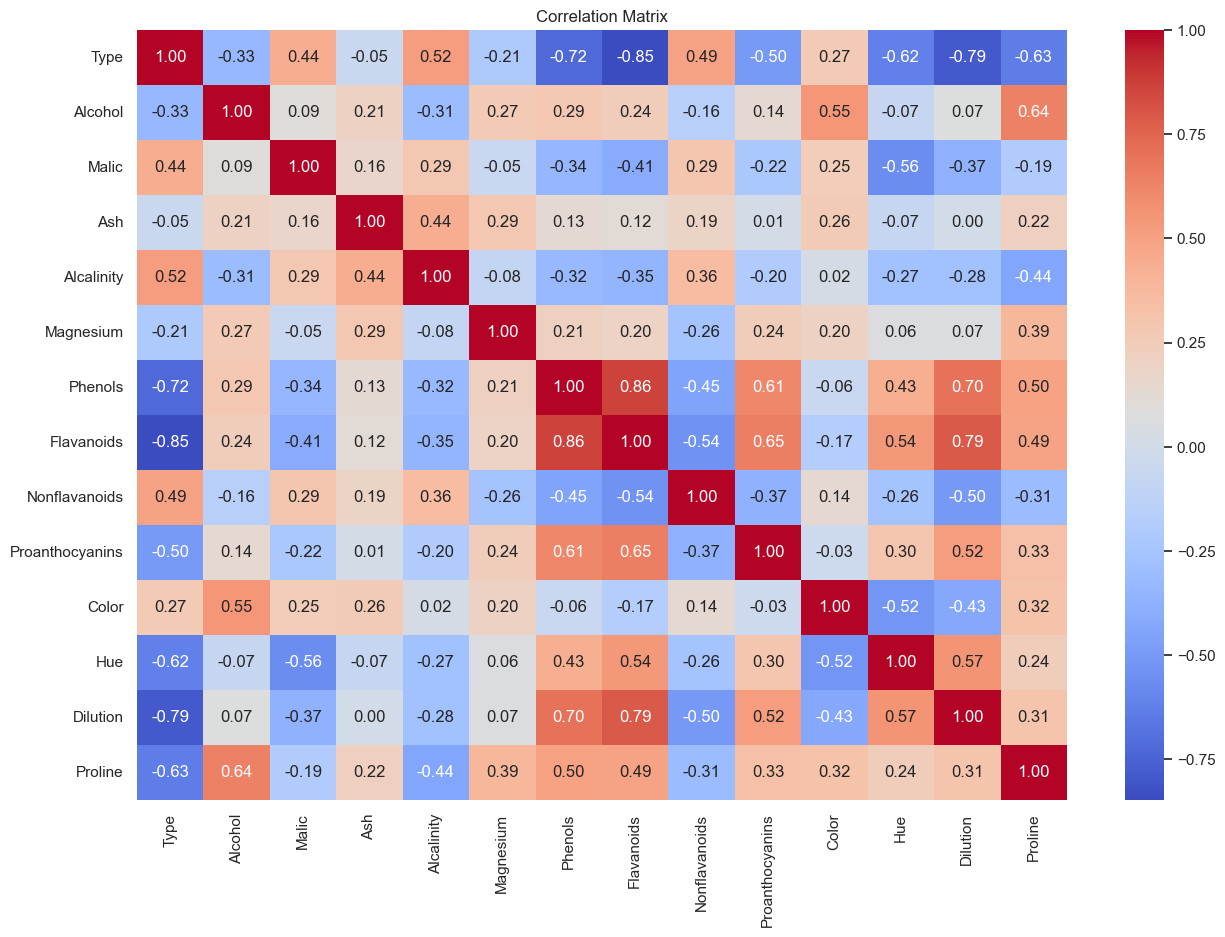

In [10]:
# Compute the correlation matrix
correlation_matrix = wine_df.corr()

# Generate a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
##Task 2: Dimensionality Reduction with PCA

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
features = wine_df.columns[1:]  # Exclude the 'Type' column
x = wine_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Create a DataFrame with the standardized features
standardized_df = pd.DataFrame(data=x, columns=features)


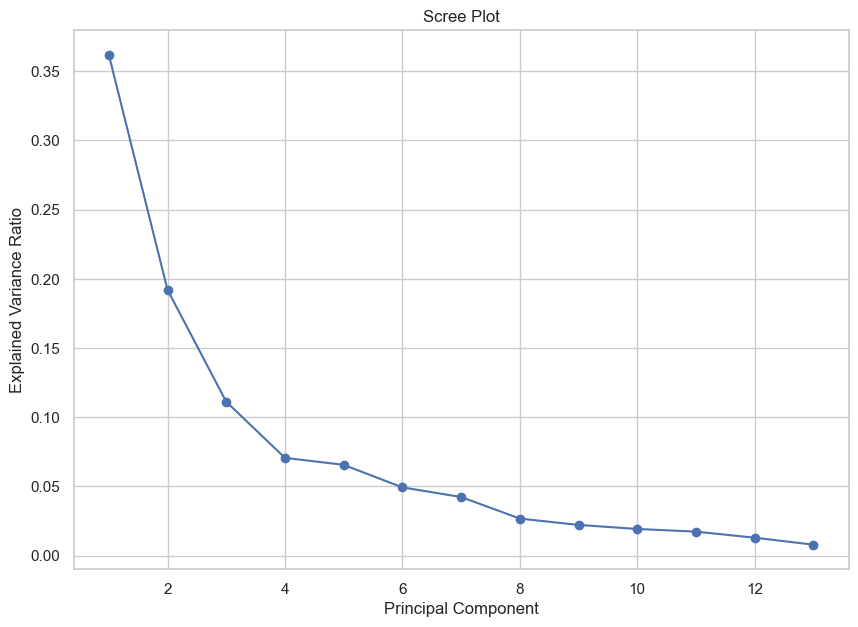

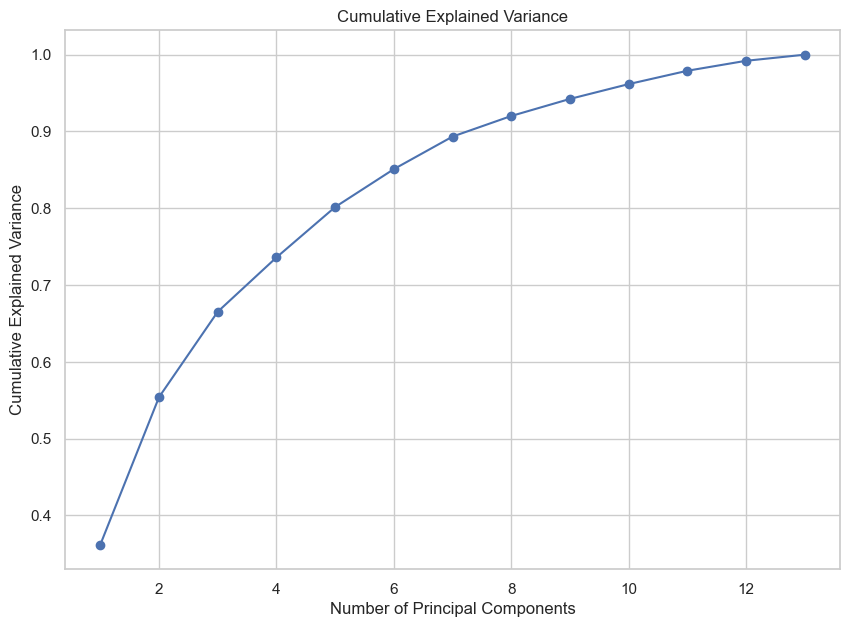

In [13]:
from sklearn.decomposition import PCA

# Implement PCA
pca = PCA()
principal_components = pca.fit_transform(x)

# Determine the optimal number of principal components using a scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Determine the optimal number of principal components using cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [14]:
# Choose the number of principal components (e.g., 2 for simplicity)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the 'Type' column with the principal components
final_df = pd.concat([wine_df[['Type']], pca_df], axis=1)
print(final_df.head())


   Type       PC1       PC2
0     1  3.316751 -1.443463
1     1  2.209465  0.333393
2     1  2.516740 -1.031151
3     1  3.757066 -2.756372
4     1  1.008908 -0.869831


In [15]:
##Task 3: Clustering with Original Data

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x)

# Add the cluster labels to the original DataFrame
wine_df['Cluster'] = clusters

# Evaluate clustering performance
silhouette_avg = silhouette_score(x, clusters)
davies_bouldin_avg = davies_bouldin_score(x, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.389187977718165


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


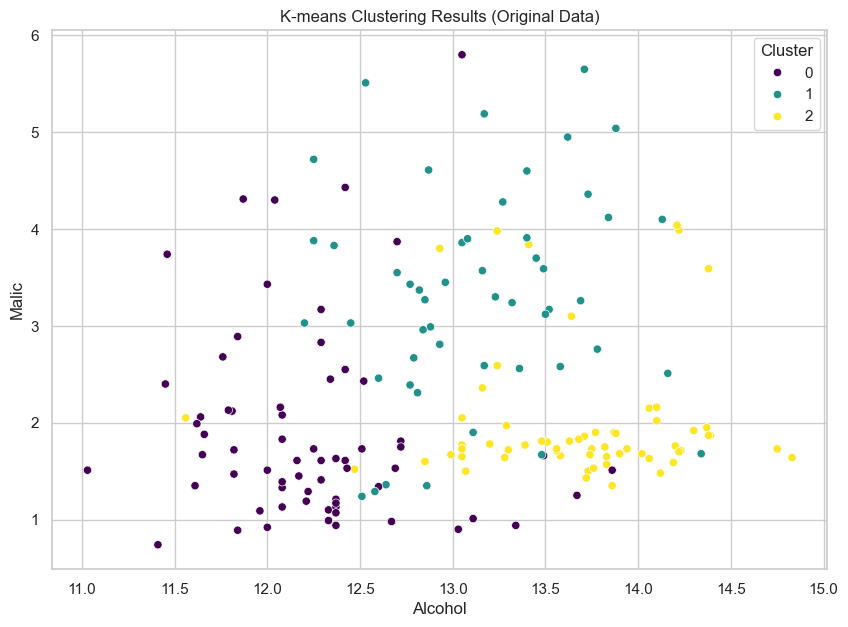

In [17]:
# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=wine_df['Alcohol'], y=wine_df['Malic'], hue=wine_df['Cluster'], palette='viridis')
plt.title('K-means Clustering Results (Original Data)')
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.show()


In [18]:
##Task 4: Clustering with PCA Data

In [19]:
# Apply K-means clustering to PCA-transformed data
pca_clusters = kmeans.fit_predict(principal_components)

# Add the cluster labels to the PCA DataFrame
final_df['Cluster'] = pca_clusters

# Evaluate clustering performance
silhouette_avg_pca = silhouette_score(principal_components, pca_clusters)
davies_bouldin_avg_pca = davies_bouldin_score(principal_components, pca_clusters)
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_avg_pca}')


Silhouette Score (PCA Data): 0.5601697480957204
Davies-Bouldin Index (PCA Data): 0.5977226208167407


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


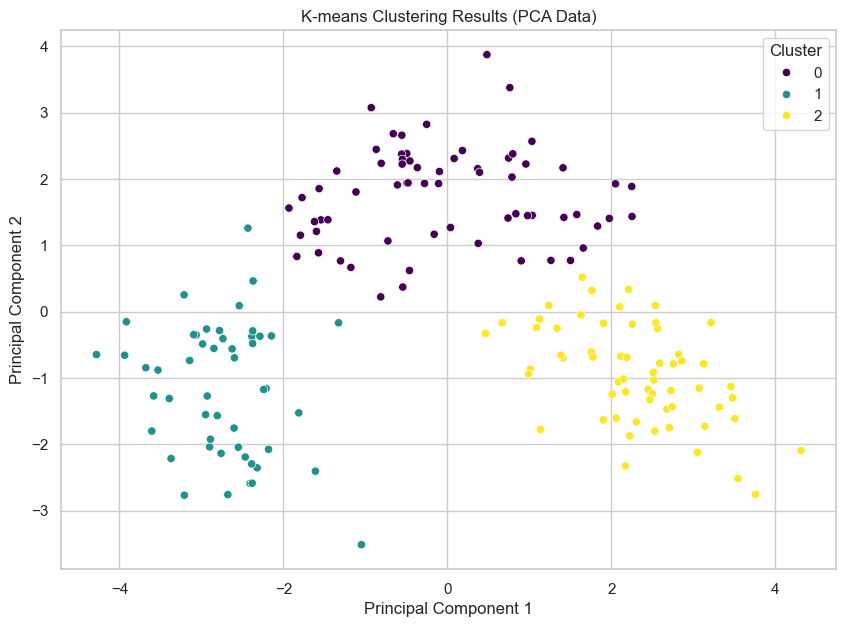

In [20]:
# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=final_df['PC1'], y=final_df['PC2'], hue=final_df['Cluster'], palette='viridis')
plt.title('K-means Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [21]:
##Task 5: Comparison and Analysis

In [22]:
# Compare silhouette scores and Davies-Bouldin indices
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_avg}')
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_avg_pca}')


Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165
Silhouette Score (PCA Data): 0.5601697480957204
Davies-Bouldin Index (PCA Data): 0.5977226208167407
